# Training Model

aujust@mail.ustc.edu.cn

In [1]:
from astrorapid.custom_classifier import create_custom_classifier
import astrorapid
from astrorapid import Classify
import numpy as np
import sys
sys.path.append('/home/Aujust/data/Kilonova/Constraint/')
sys.path.append('/home/Aujust/data/Kilonova/GPR/')
import toolkit as tkk
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir = '/home/Aujust/data/Kilonova/KN_classify/data/test_0904.pkl'
with open(dir,'rb') as f:
    data = pickle.load(f)
    f.close()
    
KN = {}
Other = {}

for obj_id in list(data.keys()):
    if data[obj_id].meta['class_num'] == 1:
        KN[obj_id] = data[obj_id]
    else:
        Other[obj_id] = data[obj_id]
        
with open('/home/Aujust/data/Kilonova/KN_classify/data/test_0904/KN.pkl','wb') as f:
    pickle.dump(KN,f)
    f.close()
with open('/home/Aujust/data/Kilonova/KN_classify/data/test_0904/Other.pkl','wb') as f:
    pickle.dump(Other,f)
    f.close()

In [3]:
def get_custom_data(class_num, data_dir, save_dir, passbands, known_redshift, nprocesses, redo, calculate_t0):
    'class_num: 1-KN, 2-Other'
    name_map = {
        1:['KN_POSSIS','KN_MOSFiT'],
        2:['SNIa','SNIbc','SNIIn','SNIIP','SNIa_91bg','SLSN']
    }

    out = {}
    
    fns = name_map[class_num]
    for fn in fns:
        f_dir = data_dir + fn + '_raw.pkl'
        with open(f_dir,'rb') as handle:
            data = pickle.load(handle)
            handle.close()
            out.update(data)
    
    # if save_dir:
    #     with open(save_dir,'wb') as handle:
    #         pickle.dump(out,handle)
    #         handle.close()

    return out

In [3]:
create_custom_classifier(get_data_func=get_custom_data,
                         data_dir='/home/Aujust/data/Kilonova/KN_classify/data/training_set_230625/',
                         class_nums=(1, 2),
                         class_name_map={1: 'KN', 2: 'Other'},
                         reread_data=True,
                         contextual_info=('distmu', 'distsigma','log_prob'),
                         passbands=('wfst_g','wfst_r','wfst_i'),
                         retrain_network=True,
                         train_epochs=100,
                         zcut=False,
                         bcut=False,
                         #ignore_classes=(61, 62, 64, 70),
                         nprocesses=None,
                         nchunks=1000,
                         timestep=0.1,
                         mintime=0,
                         maxtime=5,
                         otherchange='',
                         init_day_since_trigger=-1,
                         training_set_dir='/home/Aujust/data/Kilonova/KN_classify/data/training_set_0728',
                         save_dir='/home/Aujust/data/Kilonova/KN_classify/data/lightcurves',
                         fig_dir='/home/Aujust/data/Kilonova/KN_classify/figures0728',
                         plot=True)

/home/Aujust/data/Kilonova/KN_classify/data/training_set_0728/X_ci('distmu', 'distsigma', 'log_prob')_zFalse_bFalse_ig().npy
Preparing SNIIn_4097_31110 light curve 0 of 8
2
Preparing mosfit_967_3 light curve 1 of 8
1
Preparing SNIa_5590_11949 light curve 2 of 8
2
Preparing mosfit_967_56 light curve 3 of 8
1
Preparing SNIa_9026_12898 light curve 4 of 8
2
No data for passband:  wfst_r
Preparing SNIa_4097_21919 light curve 5 of 8
2
Preparing SNIbc_8005_42932 light curve 6 of 8
2
No data for passband:  wfst_r
Preparing POSSIS_10681_11 light curve 7 of 8
1
Preparing SNIa_4097_19339 light curve 0 of 8
2
Preparing SNIa_8005_14205 light curve 1 of 8
2
No data for passband:  wfst_r
Preparing SNIa_5590_12926 light curve 2 of 8
2
Preparing mosfit_3215_54 light curve 3 of 8
1
Preparing SNIa_1539_39151 light curve 4 of 8
2
No data for passband:  wfst_r
Preparing mosfit_663_74 light curve 5 of 8
1
No data for passband:  wfst_r
Preparing mosfit_5528_71 light curve 6 of 8
1
Preparing SNIIn_8005_3383 l

## Test

In [24]:
mjd = [0.4529,1.5153,1.5187,1.5263,3.4728,3.4761,3.4791,4.46,4.468,4.4759,5.4735,7.4612]
mab = [17.476,17.802,17.985,18.488,20.771,18.922,19.815,19.386,20.579,21.75,20.27,21.42]
merr = [0.18,0.2,0.18,1.04,0.49,0.47,0.89,0.45,1.25,1.04,1.16,1.83]
passband = ['i','i','r','g','g','i','r','i','r','g','i','i']
#passband = ['wfst_' + pb for pb in passband]
photflag = [6144] + 11*[4096]
mab,merr = np.array(mab),np.array(merr)

ra = -2
dec = -5.3
redshift = 0.01
mwebv = 0.105
objid = 'AT2017gfo_swope'
zp = 26
flux = 10**(-0.4*(mab-zp))
#fluxerr0 = -10**(-0.4*(mab+merr-zp))+flux
fluxerr = 2.5*flux*merr/np.log(10)
lc_info_1 = (mjd, flux, fluxerr, passband, photflag, ra, dec, objid, redshift, mwebv)


'AT2019npv'
zp=26
mjd = [1.2,2.2,3.1,6.0]
mab = [21.4,21.6,21.65,21.7]
flux = 10**(-0.4*(np.array(mab)-zp))
fluxerr = flux/8
passband = ['i']*4
photflag = [6144] + 3*[4096]
redshift = 0.05
objid = 'AT2019npv'
lc_info_2 = (mjd, flux, fluxerr, passband, photflag, ra, dec, objid, redshift, mwebv)


lc_list = [lc_info_2,]

In [35]:
classifier = Classify(model_filepath='/home/Aujust/data/Kilonova/KN_classify/figures1012_no_distsigma_ks32_drop01/keras_model.hdf5',
                      known_redshift=False,passbands=('g','r','i'),
                      class_names=('Kilonova','Other'),mintime=-2,maxtime=5,timestep=0.5,zcut=False,
                      contextual_info=['distmu','distsigma','log_prob'])

/home/Aujust/anaconda3/lib/python3.8/site-packages/astrorapid/ZTF_known_redshift.hdf5


Preparing light curve 0 of 1
No data for passband:  g
No data for passband:  r
1/1 [==============================] - 3s 3s/step
([array([[0.89825267, 0.10174727],
       [0.72939122, 0.27060878],
       [0.03243469, 0.96756527],
       [0.00194865, 0.99805132]])], [array([1.2, 2.2, 3.1, 6. ], dtype=float32)])


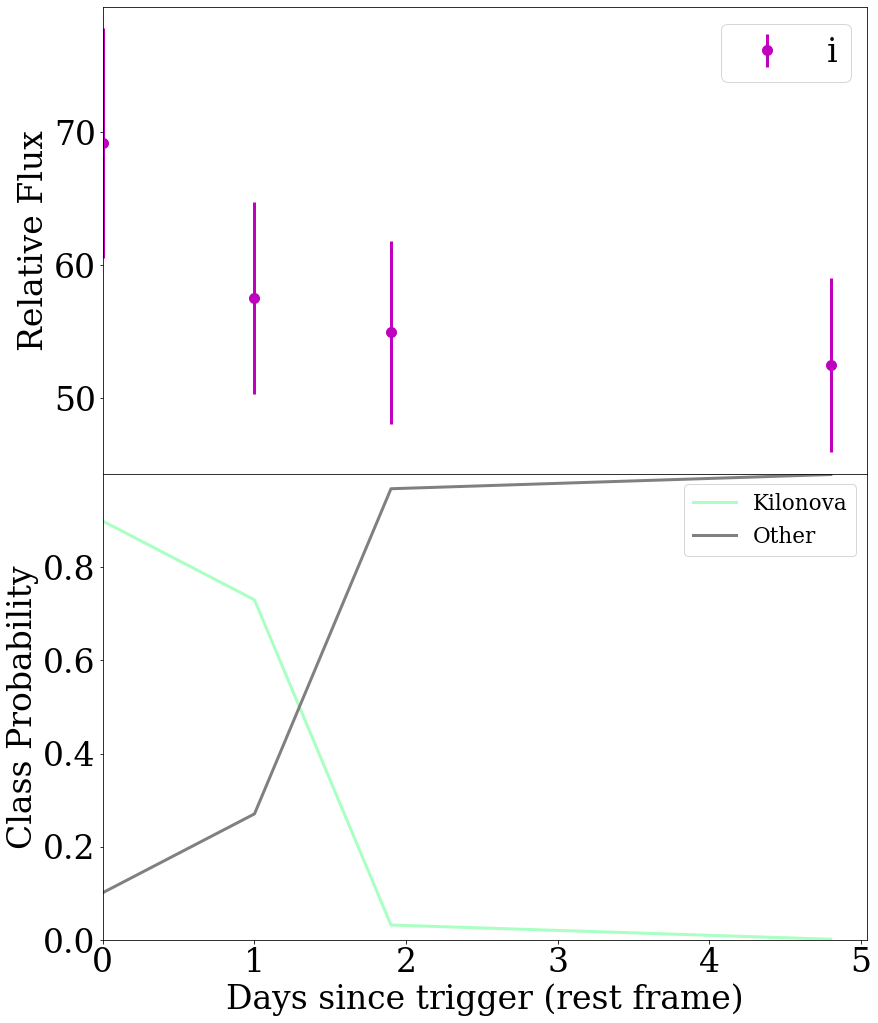

([<Table length=4>
  passband   time     flux    fluxErr  photflag
    str1   float32  float32   float32   int64  
  -------- ------- --------- --------- --------
         i     0.0   69.1831  8.647887     6144
         i     1.0 57.543995 7.1929994     4096
         i     1.9 54.954086  6.869261     4096
         i     4.8 52.480747 6.5600934     4096],
 array([[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]]),
 array([[[8.9825267e-01, 1.0174727e-01],
         [6.0623598e-01, 3.9376402e-01],
         [7.2939122e-01, 2.7060878e-01],
         [1.0860638e-01, 8.9139354e-01],
         [1.3391766e-02, 9.8660821e-01],
         [2.0754158e-03, 9.9792457e-01],
         [2.5539303e-03, 9.9744594e-01],
         [1.7470005e-03, 9.9825293e-01],
         [2.0297125e-03, 9

In [33]:
#meta = [{'distmu':40,'distsigma':5,'log_prob':0.5,'t0':0,'b':30,'redshift':0.01},]
#         {'distmu':97,'distsigma':57,'log_prob':-30,'t0':0,'b':30,'redshift':0.05}]
meta = [{'distmu':97,'distsigma':57,'log_prob':1,'t0':0},]
predictions = classifier.get_predictions(lc_list,other_meta_data=meta,return_predictions_at_obstime=True)
print(predictions)

classifier.plot_light_curves_and_classifications(show_plot=True,use_interp_flux=False,step=False,figdir='/home/Aujust/data/Kilonova/KN_classify/figures')
#classifier.plot_classification_animation()



## CF Matrix

In [5]:
#For different contexctual info of the model, modify classify.py 
class_nums = (1,2,)
data_raw = {}
for class_num in class_nums:
    out = get_custom_data(class_num,'/home/Aujust/data/Kilonova/KN_classify/data/Training_set_0908/',0,0,0,0,0,0)
    data_raw.update(out)
    
classifier = Classify(model_filepath='/home/Aujust/data/Kilonova/KN_classify/figures1012_no_distsigma_ks32_drop01/keras_model.hdf5',
                      known_redshift=False,passbands=('g','r','i'),
                      class_names=('Kilonova','Other'),mintime=-2,maxtime=5,timestep=0.5,zcut=False,
                      contextual_info=['distmu','log_prob'])

/home/Aujust/data/Kilonova/KN_classify/figures1012_no_distsigma_ks32_drop01/keras_model.hdf5


In [6]:
from tqdm import tqdm
keys = list(data_raw.keys())
n_samples = len(keys)
training_raw_index = np.random.choice(keys,int(0.1*n_samples))
lc_list = []
metas = []
y_true = []

mwebv = 0.1
ra,dec = -2,-5.3
with tqdm(total=len(training_raw_index)) as pbar:
    for objid in training_raw_index:
        info = data_raw[objid]
        
        mjd = list(info['time'])
        flux = list(info['flux'])
        fluxerr = list(info['fluxErr'])
        passband = info['passband']
        passband = [item[-1] for item in passband]
        photflag = list(info['photflag'])
        redshift = info.meta['redshift']
        
        info_i = (mjd, flux, fluxerr, passband, photflag, ra, dec, objid, redshift, mwebv)
        lc_list.append(info_i)
        meta = info.meta
        y_true.append(meta['class_num'])
        metas.append(meta)
        
        pbar.update(1)

100%|██████████| 7700/7700 [00:00<00:00, 12029.56it/s]


In [7]:
predictions,time_steps,objids = classifier.get_predictions(lc_list,other_meta_data=metas,return_predictions_at_obstime=False,return_objids=True)

Preparing light curve 0 of 7359
No data for passband:  g
Preparing light curve 1 of 7359
No data for passband:  g
Preparing light curve 2 of 7359
Preparing light curve 3 of 7359
No data for passband:  g
Preparing light curve 4 of 7359
No data for passband:  r
Preparing light curve 5 of 7359
No data for passband:  g
Preparing light curve 6 of 7359
Preparing light curve 7 of 7359
No data for passband:  r
Preparing light curve 8 of 7359
No data for passband:  g
Preparing light curve 9 of 7359
Preparing light curve 10 of 7359
No data for passband:  g
Preparing light curve 11 of 7359
No data for passband:  r
Preparing light curve 12 of 7359
No data for passband:  g
Preparing light curve 13 of 7359
Preparing light curve 14 of 7359
No data for passband:  g
Preparing light curve 15 of 7359
No data for passband:  g
Preparing light curve 16 of 7359
No data for passband:  g
Preparing light curve 17 of 7359
Preparing light curve 18 of 7359
No data for passband:  g
Preparing light curve 19 of 7359


In [8]:
y_predictions = [1 if item[-1,0]>0.45 else 2 for item in predictions]
y_trues = [data_raw[objid].meta['class_num'] for objid in objids]

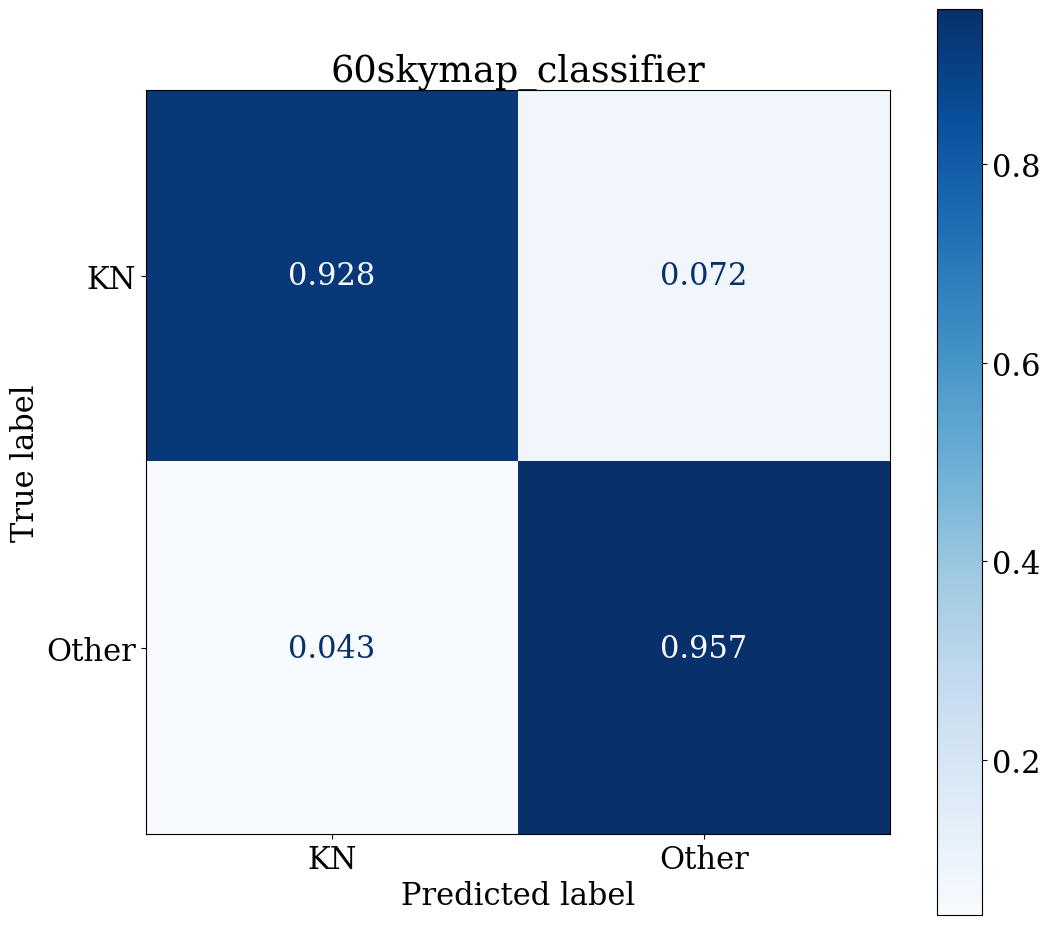

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 22
fig,ax = plt.subplots(figsize=(12,12),dpi=100)

ConfusionMatrixDisplay.from_predictions(y_trues, y_predictions,normalize='true',display_labels=['KN','Other'],cmap='Blues',ax=ax,values_format='.3f')
plt.title('60skymap_classifier')
plt.show()
context_guide = 'no_distsigma'
#plt.savefig('./figures/60skymap_cf_{}.pdf'.format(context_guide),dpi=300)

In [8]:
'ROC curve'
from sklearn.metrics import confusion_matrix

THRESHOLDS = np.linspace(0.001,0.999,50)

'KN'
TP = []
FP = []
'Other'
TP2 = []
FP2 = []

for threshold in THRESHOLDS:
    y_predictions = [1 if item[-1,0]>threshold else 2 for item in predictions]
    y_trues = [data_raw[objid].meta['class_num'] for objid in objids]
    cf = confusion_matrix(y_trues,y_predictions,normalize='true')
    TP.append(cf[0,0])
    FP.append(cf[1,0])
    TP2.append(cf[1,1])
    FP2.append(cf[0,1])

'default'
default_thres = 0.45
y_predictions = [1 if item[-1,0]>default_thres else 2 for item in predictions]
y_trues = [data_raw[objid].meta['class_num'] for objid in objids]
cf = confusion_matrix(y_trues,y_predictions,normalize='true')
default_x = [cf[1,0],cf[0,1]]
default_y = [cf[0,0],cf[1,1]]

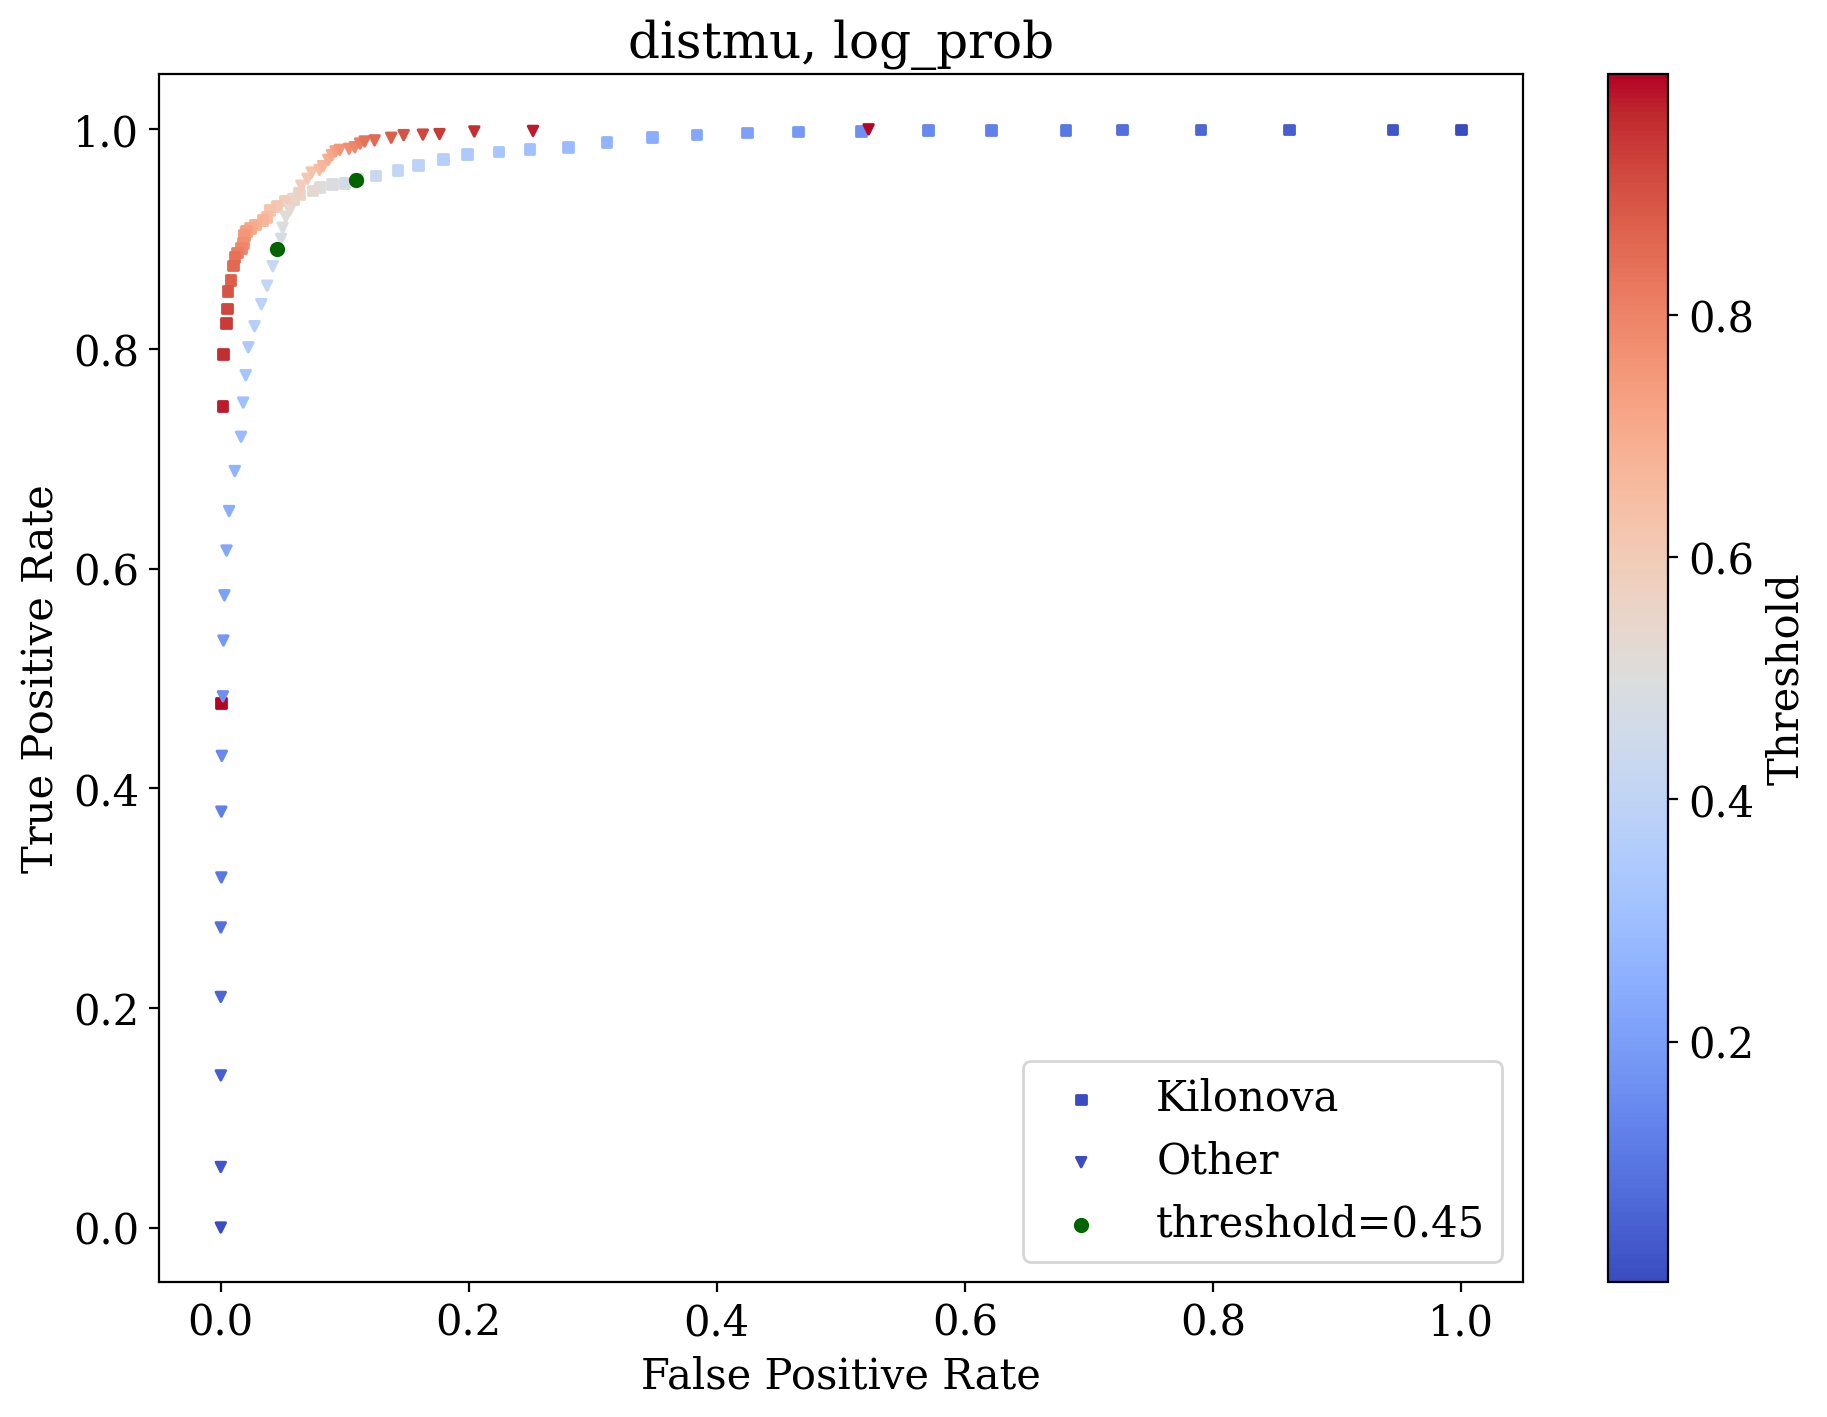

In [9]:
fig,ax = plt.subplots(figsize=(11,8),dpi=200)
plt.rcParams["font.family"] = 'serif'
im = ax.scatter(FP,TP,c=THRESHOLDS,marker='s',s=12,cmap='coolwarm',label='Kilonova')
im = ax.scatter(FP2,TP2,c=THRESHOLDS,marker='v',s=12,cmap='coolwarm',label='Other')
ax.scatter(default_x,default_y,s=20,c='darkgreen',label='threshold={}'.format(default_thres))
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
ax.set_title('distmu, log_prob')

cbar = plt.colorbar(im,ax=ax)
cbar.set_label('Threshold')

## Ranking Candidates vs. True KN Inclusion

for each survey, choose one KN and n SNs, ranking their KN prob and test if we can pick right one in our candidate list

In [9]:
def get_all_event_ids(objids):
    out = []
    for objid in objids:
        l = objid.split('_')
        out.append(l[1])
    return np.unique(out)


all_event_ids_full = get_all_event_ids(keys)
#all_event_ids = get_all_event_ids(objids)
#y_trues = [data_raw[objid].meta['class_num'] for objid in objids]

In [10]:
def split_data(trues,predictions,all_event_ids=all_event_ids_full):
    out = {id:{1:[],2:[]} for id in all_event_ids}
    for i, objid in enumerate(objids):
        l = objid.split('_')
        ID = l[1]
        y_true = trues[i]
        kn_prob = predictions[i][-1,0]
        out[ID][y_true].append(kn_prob)
    return out

def ranking_candidates(data,event_id,candidate_nums=21):  #1 KN + 20 SN
    kns = data[event_id][1]
    kn = np.random.choice(kns,1)
    sns = data[event_id][2]
    sns = np.random.choice(sns,candidate_nums-1)
    probs = np.concatenate((kn,sns))  #KN is the last element in the array
    order = (-probs).argsort()
    ranking = order.argsort()
    return ranking[0]+1
        
sp_data = split_data(y_trues,predictions)
#ranking_candidates(sp_data,np.random.choice(all_event_ids,1)[0],50)

For SC=10, Fitting parameters a=1.1543, b=0.0821
For SC=15, Fitting parameters a=1.2146, b=0.0853
For SC=20, Fitting parameters a=1.3334, b=0.1006


Text(0.5, 0, 'Detected Candidates')

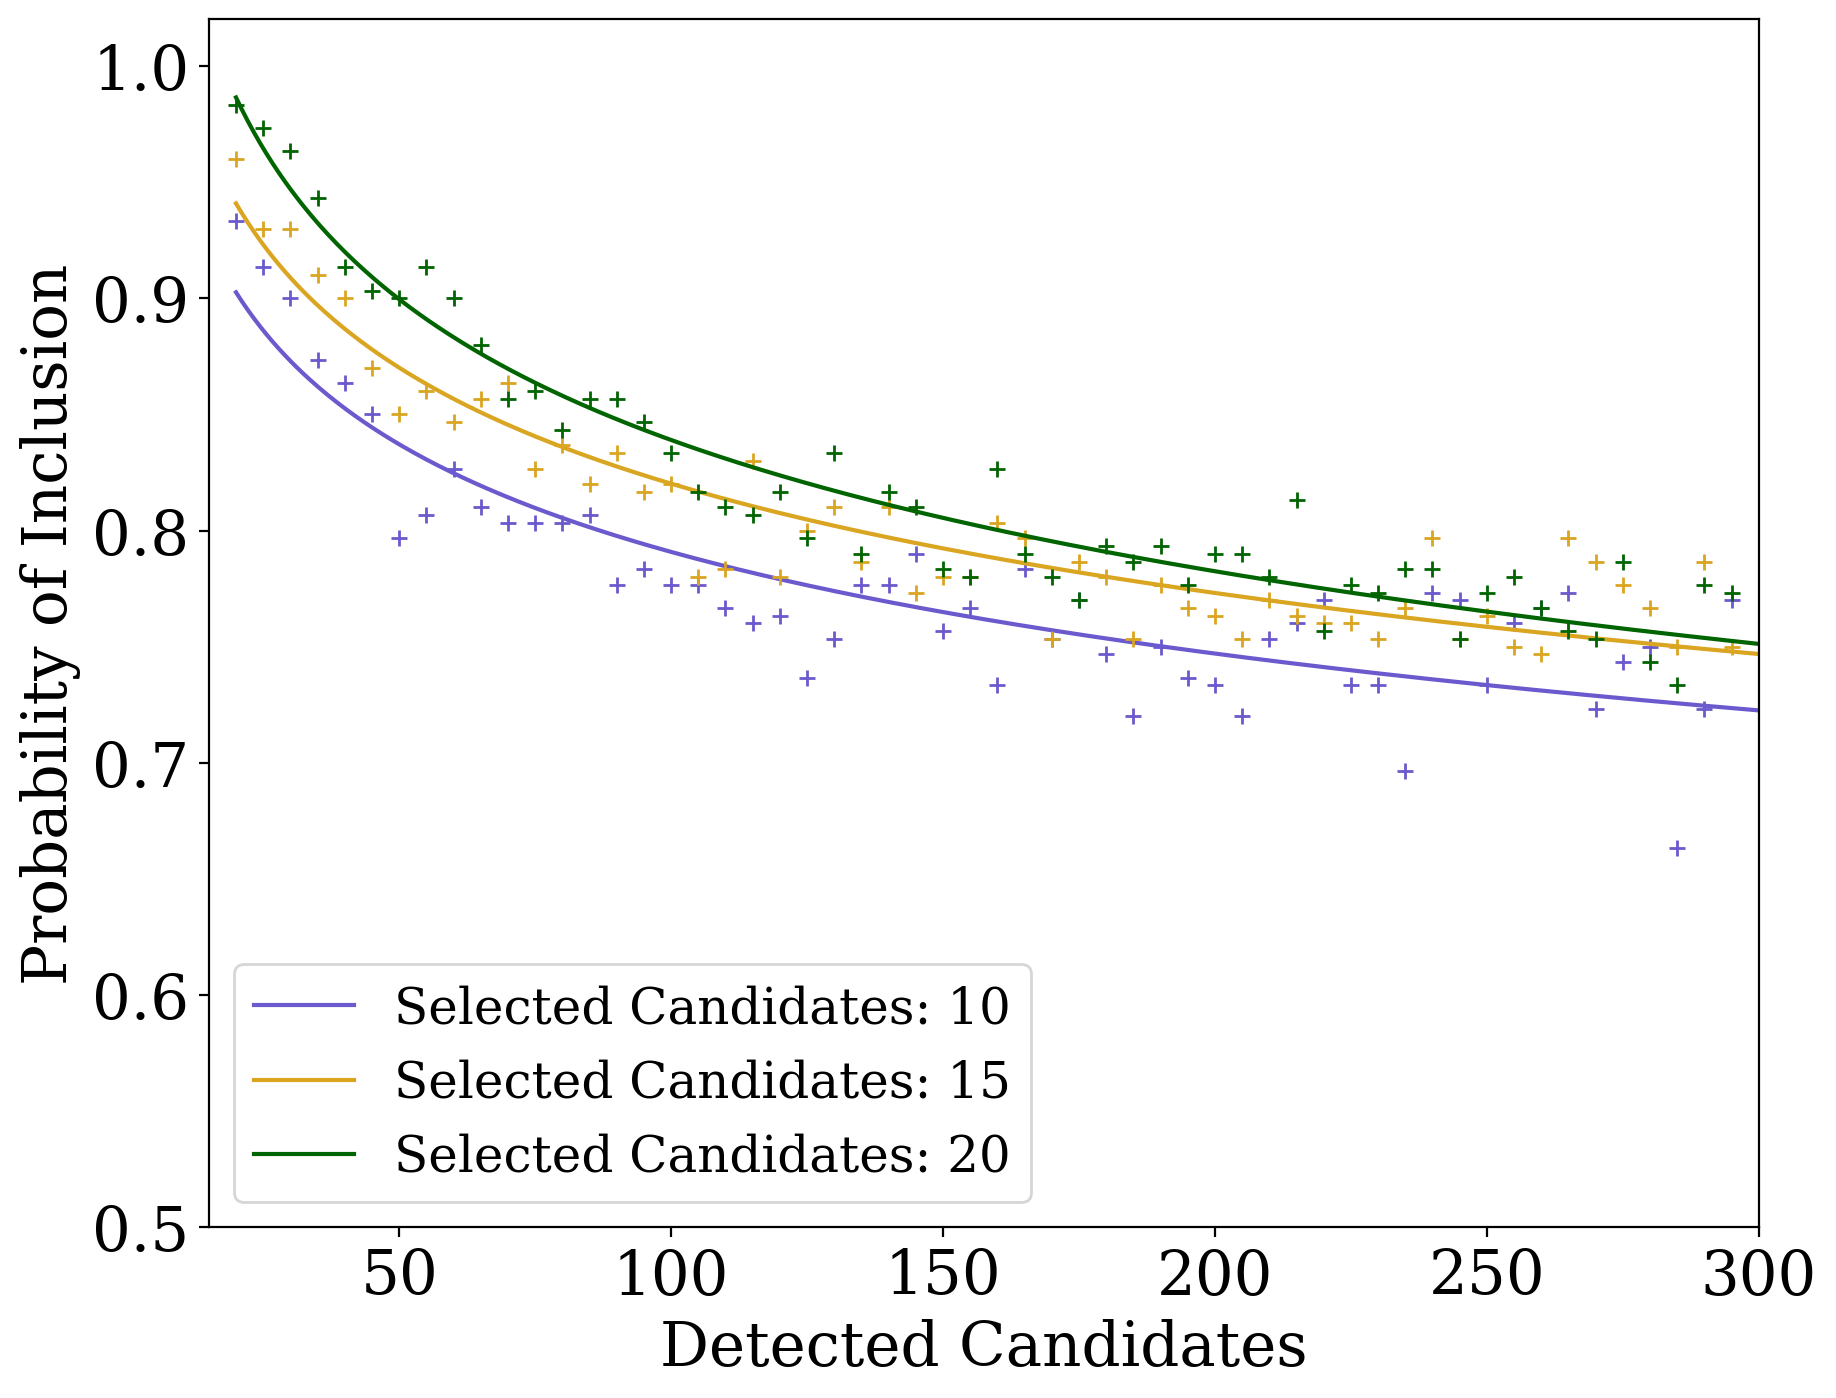

In [12]:
from scipy.optimize import leastsq
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = 22
fig,ax = plt.subplots(figsize=(10,8),dpi=200)
COLORS = ['slateblue','goldenrod','darkgreen']

select_cand_list = [10,15,20]
detect_cand_list = np.arange(20,300,5)
aug = 5

STAT = {sc:0 for sc in select_cand_list}
for j,select_cand in enumerate(select_cand_list):
    kn_in_select = []
    kn_rank_stat = {}

    dom = len(all_event_ids_full)
    for i,detect_cand in enumerate(detect_cand_list):
        num = np.zeros(aug)
        stat = []
        for event_id in all_event_ids_full:
            for t in range(aug):
                try:
                    kn_ranking = ranking_candidates(sp_data,event_id,detect_cand)
                    stat.append(kn_ranking)
                    if kn_ranking <= select_cand:
                        num[t] += 1
                    kn_rank_stat[detect_cand] = stat
                except:
                    continue
        kn_in_select.append(np.mean(num)/dom)
        
    STAT[select_cand] = kn_rank_stat
        
    def err_inclusion(p,x,y):
        return p[0]*x**(-p[1]) - y

    p0 = [1e-2,0.1]
    ret = leastsq(err_inclusion, p0, args = (detect_cand_list,kn_in_select))
    x_ = np.linspace(20,300,500)
    a,b = ret[0]
    print('For SC={}, Fitting parameters a={:.4f}, b={:.4f}'.format(select_cand,a,b))

    ax.plot(detect_cand_list,kn_in_select,'+',color=COLORS[j])
    ax.plot(x_,a*x_**(-b),color=COLORS[j],label='Selected Candidates: {}'.format(select_cand))
    
#ax.set_xscale('log')
ax.legend(loc='lower left',fontsize=18)
ax.set_xlim(15,300)
ax.set_ylim(0.5,1.02)
ax.set_ylabel('Probability of Inclusion')
ax.set_xlabel('Detected Candidates')
#ax.text(20,0.52,'Selected Candidates: {}'.format(select_cand),fontsize=13)   
#plt.savefig('./figures/inclusion_stat.pdf',dpi=300)


Text(0.5, 0, '$n_{\\rm DC}$')

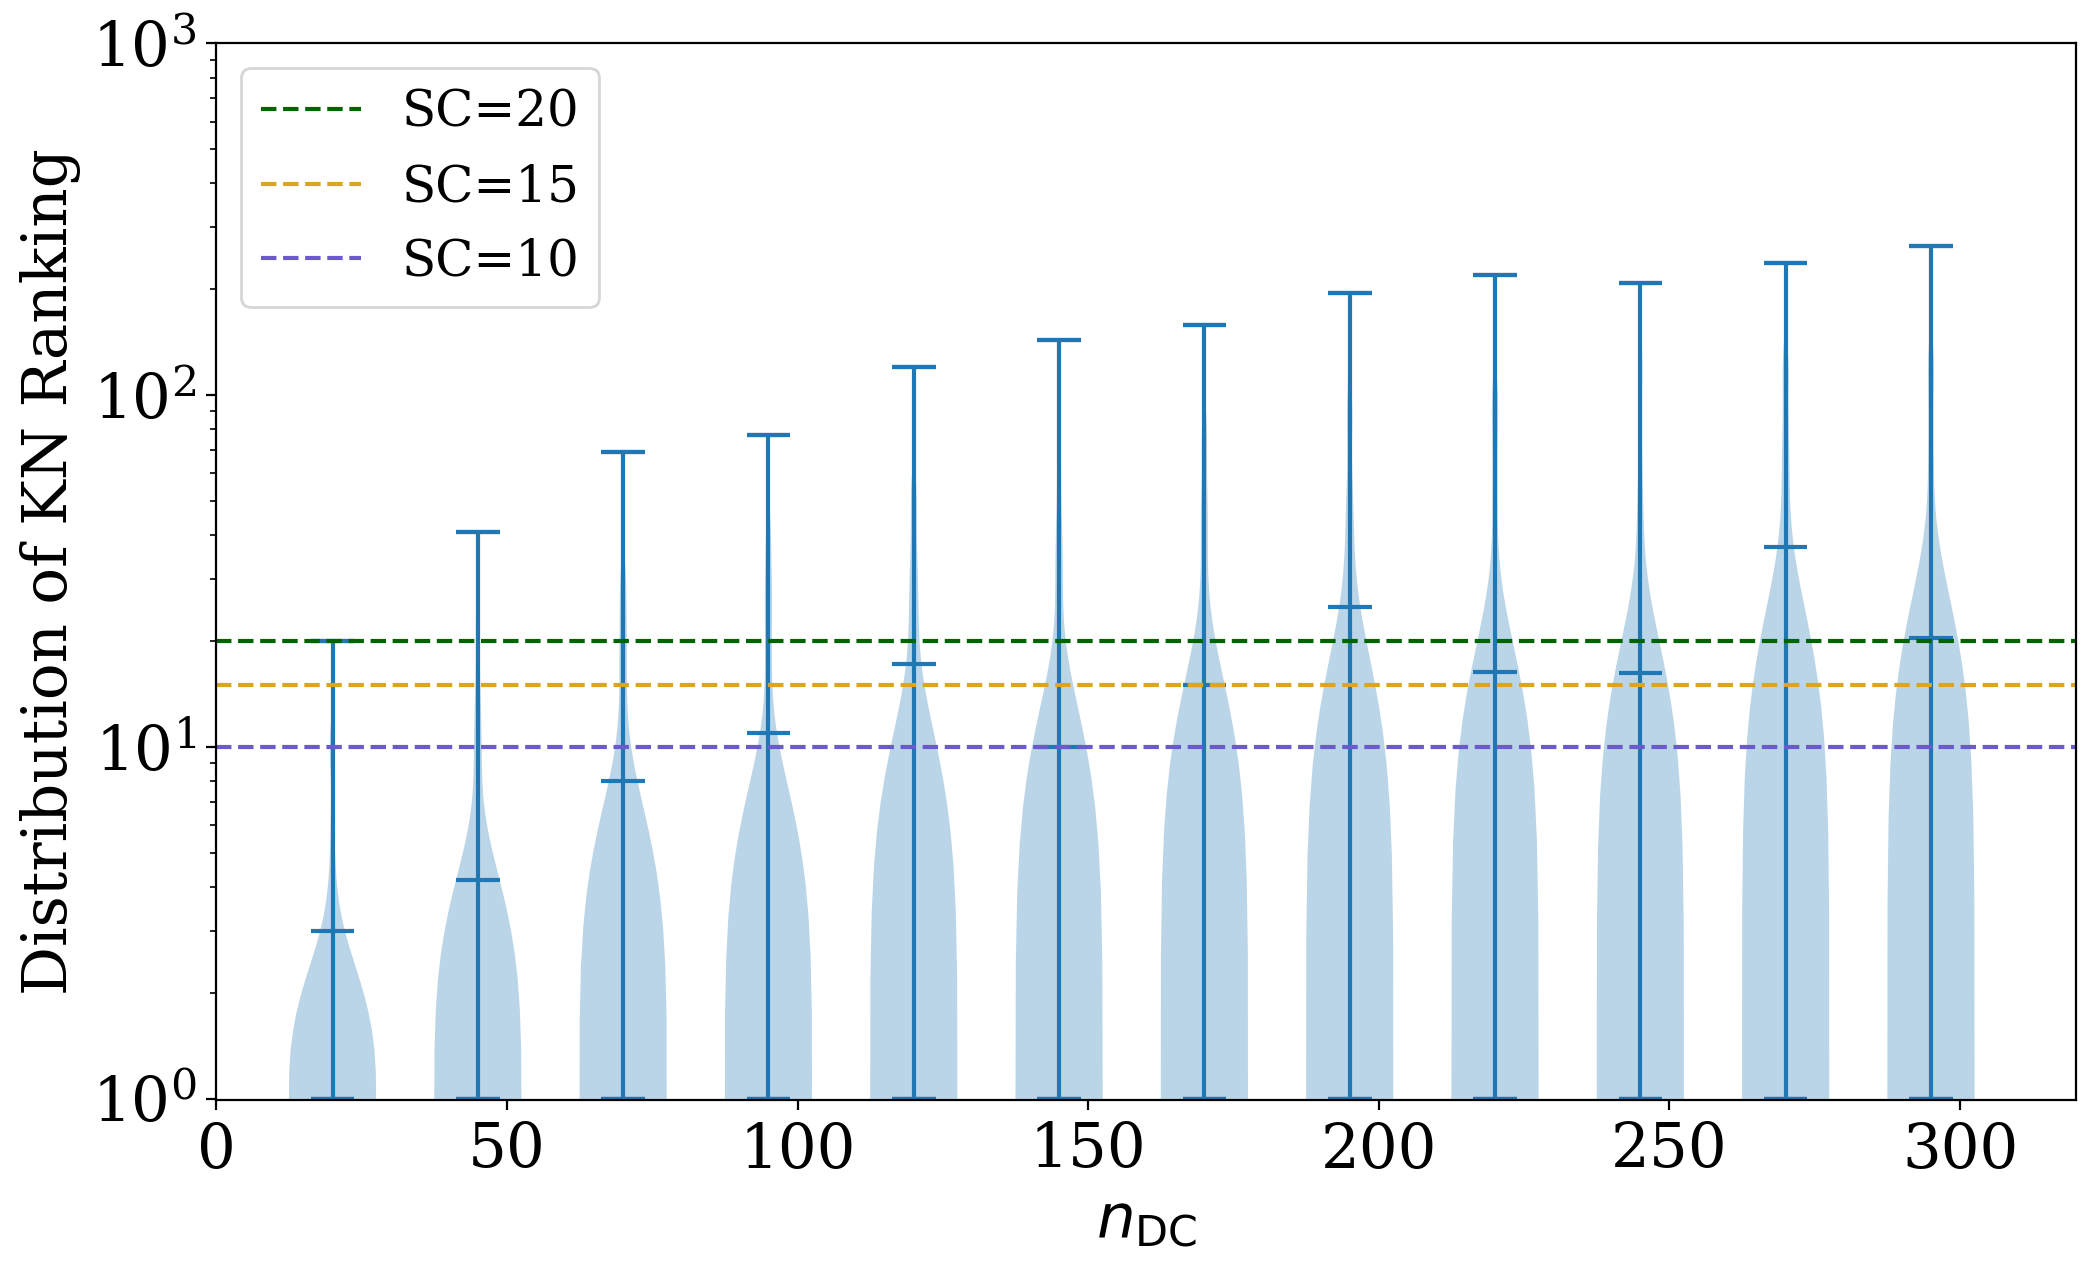

In [18]:
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = 22
fig,ax = plt.subplots(figsize=(12,7),dpi=200)

x_offset = [0,2,4]

for j,select_cand in enumerate(select_cand_list[:1]):
    x_ = detect_cand_list + x_offset[j]
    y_ = []
    y_upper = []
    y_lower = []
    DATA_ = []
    for i,detect_cand in enumerate(detect_cand_list[::5]):
        data = STAT[select_cand][detect_cand]
        DATA_.append(data)
        median = np.mean(STAT[select_cand][detect_cand])
        upper = np.quantile(STAT[select_cand][detect_cand],0.95)
        lower = np.quantile(STAT[select_cand][detect_cand],0.1)
        y_.append(median)
        y_upper.append(upper)
        y_lower.append(lower)

    y_ = np.array(y_)
    y_upper = np.array(y_upper)
    y_lower = np.array(y_lower)
    yerr = [y_-y_lower,y_upper-y_]
    #ax.errorbar(x_,y_,yerr,marker='o',linestyle='')
    part = ax.violinplot(DATA_,x_[::5],widths=15,showmedians=True,quantiles=[[0.5,0.8,1] for _ in range(len(DATA_))])
    #ax.scatter(x_[::5],y_,color='crimson',zorder=10,label='Mean')


handles = [Line2D([0], [0], color=COLORS[i],linestyle='dashed', lw=1.5, label='SC={}'.format(select_cand_list[i])) for i in range(2,-1,-1)]
#handles.append(Line2D([0], [0], color='steelblue',marker='o',markeredgecolor='crimson',markerfacecolor='crimson', markersize=6, label='Mean'))
ax.legend(handles=handles,loc='upper left',fontsize=18)
ax.hlines(select_cand_list,0,320,color=COLORS,linestyles='dashed')
ax.set_yscale('log')
ax.set_ylim([0.99,1e3])
ax.set_xlim([0,320])
ax.set_ylabel('Distribution of KN Ranking')
ax.set_xlabel(r'$n_{\rm DC}$')
#plt.savefig('./figures/kn_ranking_violin.pdf',dpi=300)

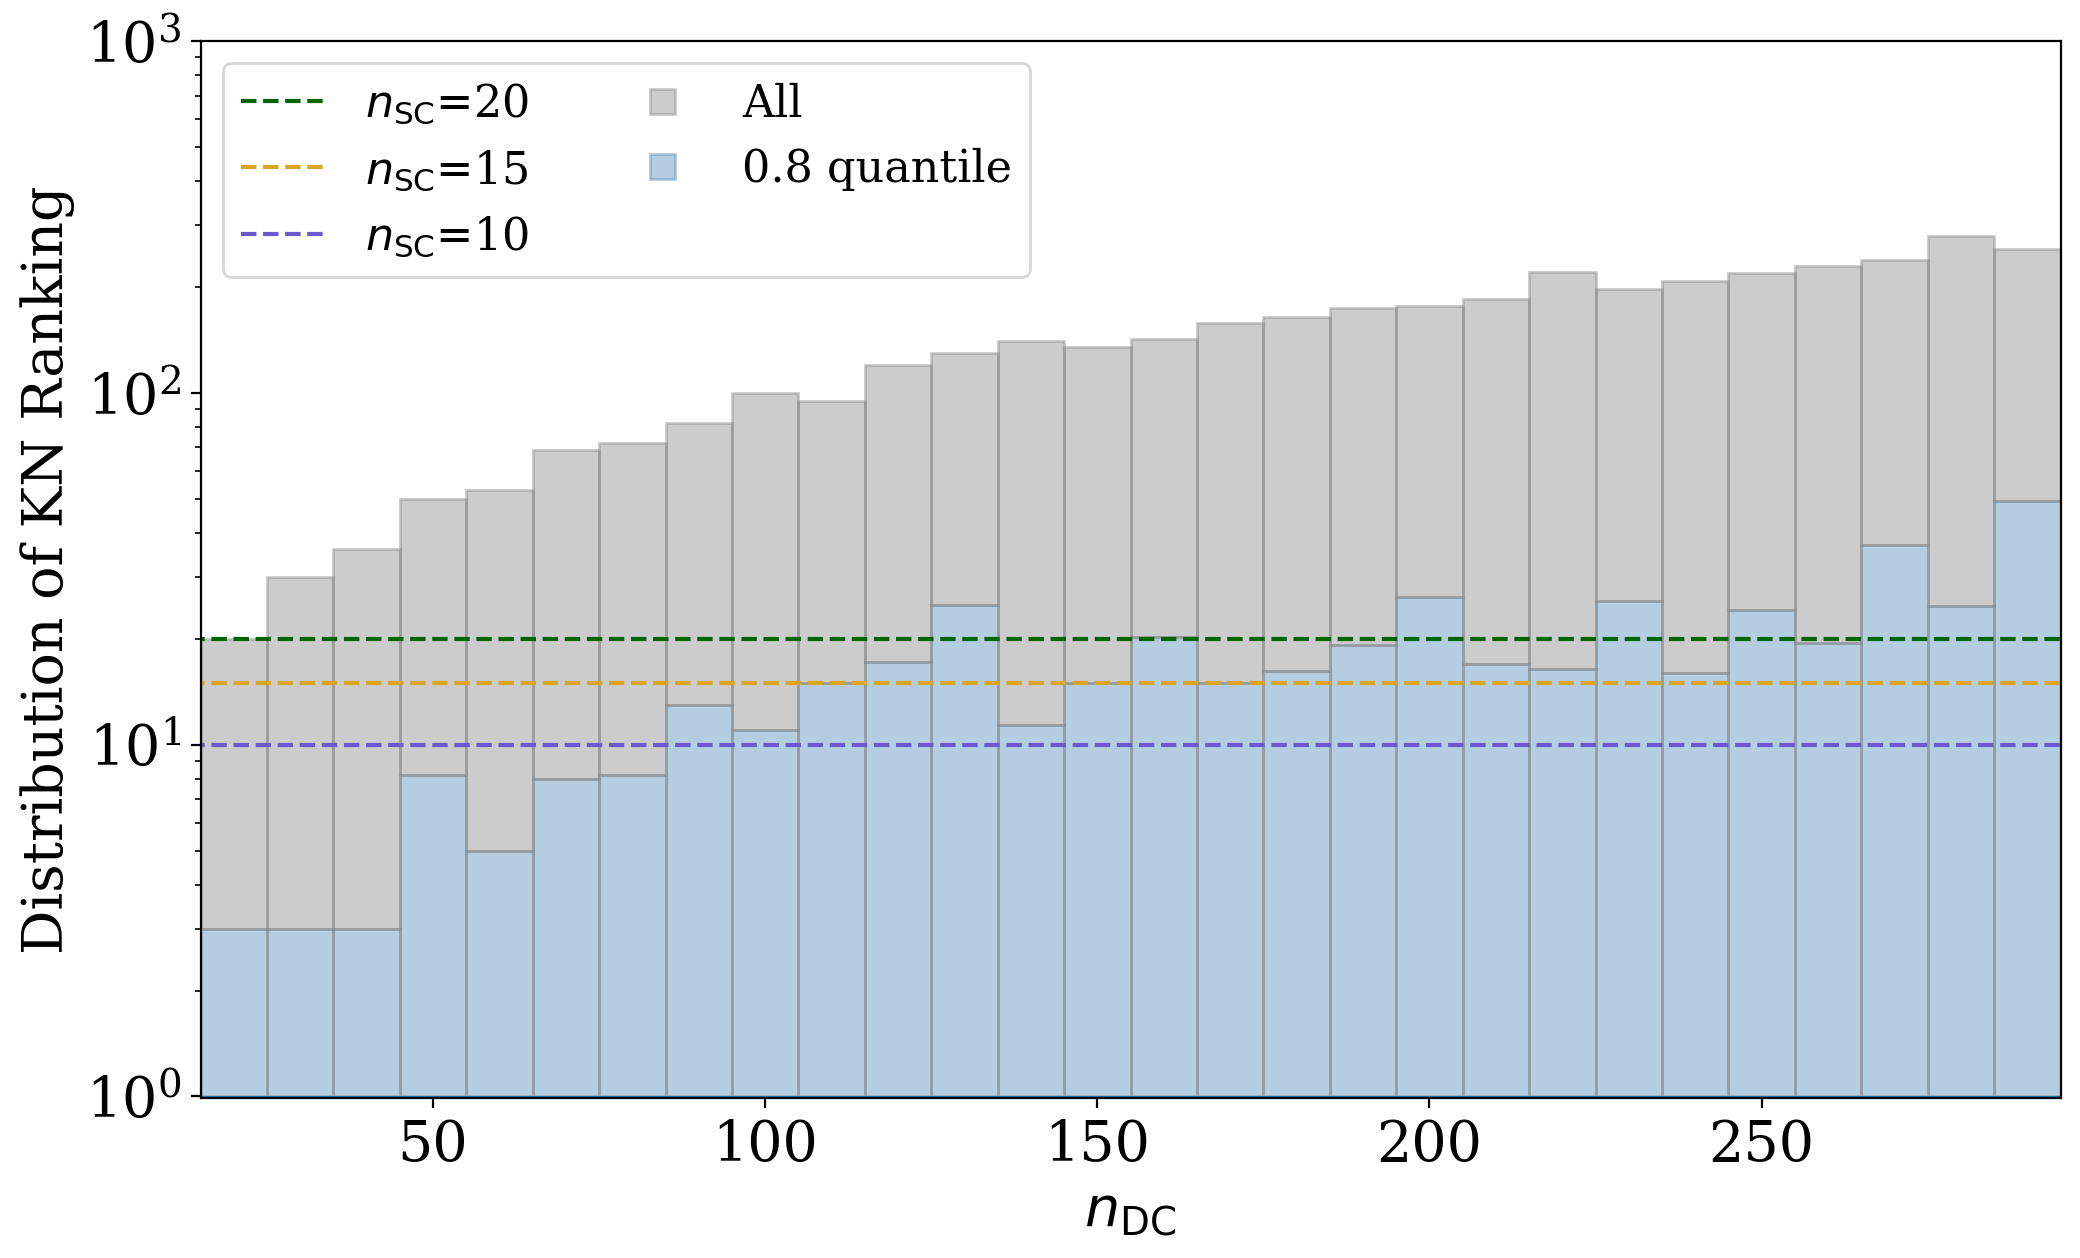

In [84]:
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = 20
fig,ax = plt.subplots(figsize=(12,7),dpi=200)

x_offset = [0,2,4]

for j,select_cand in enumerate(select_cand_list[:1]):
    x_ = detect_cand_list[::2] + x_offset[j]
    worst_ = []
    less_worst_ = []
    moderate_ = []
    for i,detect_cand in enumerate(detect_cand_list[::2]):
        data = STAT[select_cand][detect_cand]
        DATA_.append(data)

        worst = np.quantile(STAT[select_cand][detect_cand],1)
        less_worst = np.quantile(STAT[select_cand][detect_cand],0.8)
        moderate = np.quantile(STAT[select_cand][detect_cand],0.6)
        
        worst_.append(worst)
        less_worst_.append(less_worst)
        moderate_.append(moderate)

    worst_ = np.array(worst_)
    less_worst_ = np.array(less_worst_)
    moderate_ = np.array(moderate_)
    
    ax.bar(x_, worst_-less_worst_, width=x_[1]-x_[0], bottom=less_worst_,color='gray',edgecolor='gray',alpha=0.4)
    ax.bar(x_, less_worst_-moderate_, width=x_[1]-x_[0], bottom=moderate_,color='steelblue',edgecolor='gray',alpha=0.4)
    ax.bar(x_, moderate_, width=x_[1]-x_[0])
    
handles = [Line2D([0], [0], color=COLORS[i],linestyle='dashed', lw=1.5, label=r'$n_{\rm SC}$'+'={}'.format(select_cand_list[i])) for i in range(2,-1,-1)]
handles.append(Line2D([0], [0], marker='s',color='gray',alpha=0.4,markersize=9,linestyle='None',label='All'))
handles.append(Line2D([0], [0], marker='s',color='steelblue',alpha=0.4,markersize=9,linestyle='None',label='0.8 quantile'))
ax.legend(handles=handles,loc='upper left',fontsize=16, ncol=2)
ax.hlines(select_cand_list,0,320,color=COLORS,linestyles='dashed')
ax.set_yscale('log')
ax.set_ylim([0.99,1e3])
ax.set_xlim([15,295])
ax.set_ylabel('Distribution of KN Ranking')
ax.set_xlabel(r'$n_{\rm DC}$')
plt.savefig('./figures/kn_ranking_bar.pdf')

In [66]:
detect_cand_list

array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
       150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210,
       215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275,
       280, 285, 290, 295])

### Trigger Elapse

In [7]:
import os
import pandas as pd


survey_dir = '/home/Aujust/data/Kilonova/WFST/ms_event'

def get_coverage(survey_dir,event_id):

    final_dir = '{}/MS_{}/final/'.format(survey_dir,event_id)

    ftest = os.listdir(final_dir)[0]
    index = int(ftest.split('.')[0][-1])

    #summary_dir = '{}/MS_{}/exposure_optimise/test_summary_{}.csv'.format(survey_dir,event_id,index)
    if os.path.exists('{}/MS_{}/exposure_optimise'.format(survey_dir,event_id)):
        summary_dir = '{}/MS_{}/exposure_optimise'.format(survey_dir,event_id)
        sub_dir = 'exposure_optimise'
    else:
        summary_dir = '{}/MS_{}/doRaslice_exposure_optimise'.format(survey_dir,event_id)
        sub_dir = 'doRaslice_exposure_optimise'
        
    flist = os.listdir(summary_dir)
    flist = [item for item in flist if item[:4] == 'test']
    
    dir = '{}/{}'.format(summary_dir,flist[-1])
    f = pd.read_csv(dir)
    return f['obsprob_1'].iloc[0]

get_coverage(survey_dir,90)

0.76461

In [8]:
from test import read_datas, get_basic_ms

event_ids, skymaps, plans, gw_triggers = get_basic_ms('/home/Aujust/data/Kilonova/WFST/ms_event',
                 '/home/Aujust/data/Kilonova/Constraint/Skymaps/bns_astro/bns_skymap',
                 use_plan=True,
                 plan_dir='/home/Aujust/data/Kilonova/Constraint/plans/MS')

t_elapse = []
t_obs = []
coverages = []
survey_dir = '/home/Aujust/data/Kilonova/WFST/ms_event'

for i in range(len(event_ids)):
    event_id = event_ids[i]
    if event_id in all_event_ids_full:
        t_trigger = plans[i].pointings['time'].min()
        t_elapse.append(t_trigger-gw_triggers[i])
        times = plans[i].pointings['time']
        coverage = get_coverage(survey_dir,int(event_id))
        coverages.append(coverage)
        for time in times:
            t_obs.append(time-gw_triggers[i])
    

Pre-processing 555.fits
Pre-processing 332.fits
Pre-processing 361.fits
Pre-processing 101.fits
Pre-processing 302.fits
Pre-processing 792.fits
Pre-processing 761.fits
Pre-processing 994.fits
Pre-processing 509.fits
Pre-processing 640.fits
Pre-processing 846.fits
Pre-processing 270.fits
Pre-processing 883.fits
Pre-processing 5.fits
Pre-processing 882.fits
Pre-processing 285.fits
Pre-processing 90.fits
Pre-processing 238.fits
Pre-processing 863.fits
Pre-processing 403.fits
Pre-processing 631.fits
Pre-processing 201.fits
Pre-processing 665.fits
Pre-processing 239.fits
Pre-processing 91.fits
Pre-processing 980.fits
Pre-processing 179.fits
Pre-processing 942.fits
Pre-processing 124.fits
Pre-processing 579.fits
Pre-processing 745.fits
Pre-processing 928.fits
Pre-processing 319.fits
Pre-processing 533.fits
Pre-processing 195.fits
Pre-processing 132.fits
Pre-processing 755.fits
Pre-processing 309.fits
Pre-processing 955.fits
Pre-processing 798.fits


Pre-processing 901.fits
Pre-processing 306.fits
Pre-processing 273.fits
Pre-processing 413.fits
Pre-processing 818.fits
Pre-processing 476.fits
Pre-processing 218.fits
Pre-processing 471.fits
Pre-processing 7.fits
Pre-processing 9.fits
Pre-processing 226.fits
Pre-processing 669.fits
Pre-processing 204.fits
Pre-processing 895.fits
Pre-processing 605.fits
Pre-processing 868.fits
Pre-processing 650.fits
Pre-processing 856.fits
Pre-processing 258.fits
Pre-processing 603.fits
Pre-processing 323.fits
Pre-processing 312.fits
Pre-processing 785.fits
Pre-processing 379.fits
Pre-processing 526.fits
Pre-processing 521.fits
Pre-processing 110.fits
Pre-processing 518.fits
Using processed plans.


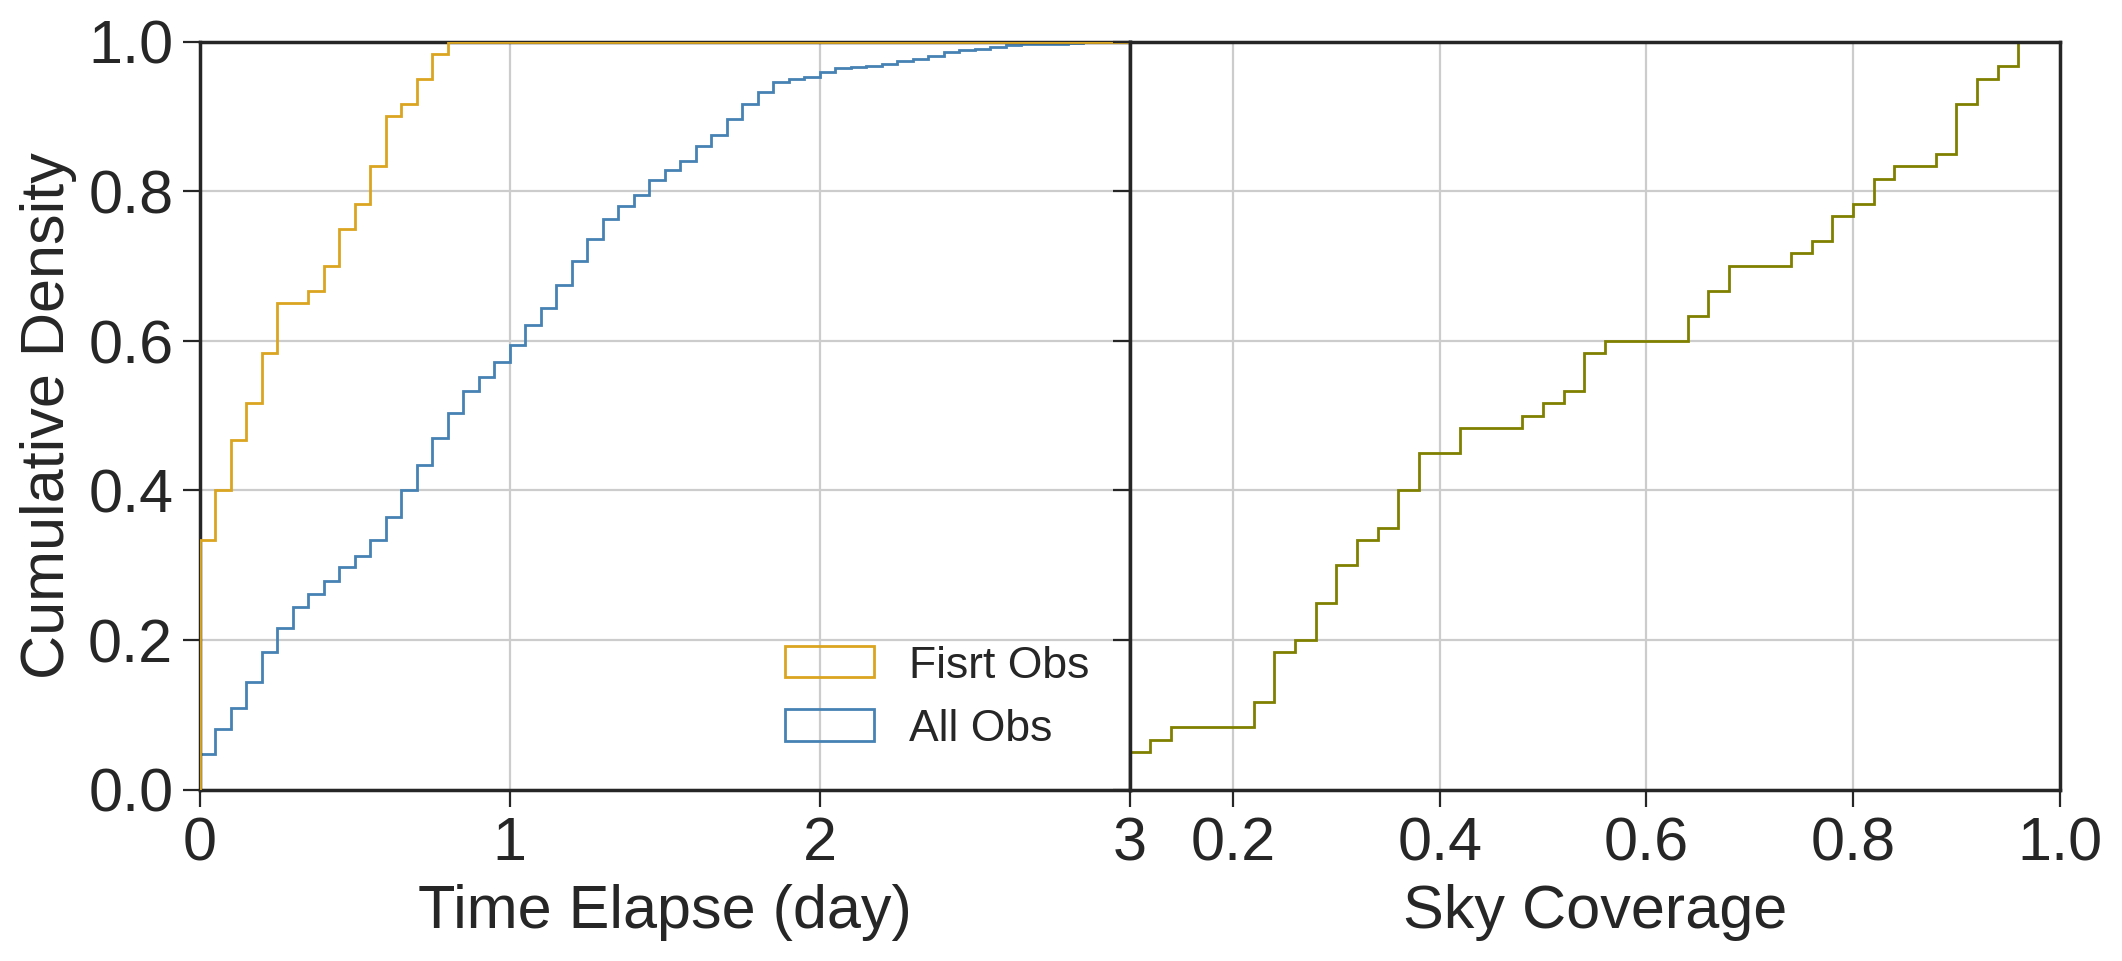

In [9]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = 22
plt.style.use('seaborn-ticks')
fig,ax = plt.subplots(1,2,figsize=(12,5.5),sharey=True,dpi=200)
fig.subplots_adjust(bottom=0.2,wspace=0.)
bins = 60
weights = np.ones(len(t_elapse))*len(t_obs)/len(t_elapse)
#ax.hist(t_elapse,bins=bins,histtype='stepfilled',color='goldenrod',density=True,weights=weights,alpha=0.2,zorder=10,range=(0,3),cumulative=True)
#ax.hist(t_obs,bins=bins,histtype='stepfilled',color='steelblue',density=True,alpha=0.2,range=(0,3),cumulative=True)
ax[0].hist(t_elapse,bins=bins,histtype='step',color='goldenrod',density=True,weights=weights,zorder=10,range=(0,3),cumulative=True,label='Fisrt Obs')
ax[0].hist(t_obs,bins=bins,histtype='step',color='steelblue',density=True,range=(0,3),cumulative=True,label='All Obs')
ax[0].set_xlabel('Time Elapse (day)')
ax[0].set_ylabel('Cumulative Density')
ax[0].set_xlim([0,3])
ax[0].set_ylim([0,1])
#ax[0].set_yscale('log')
ax[0].grid()
ax[0].legend(fontsize=16,loc='lower right')

ax[1].set_xticks([0.2,0.4,0.6,0.8,1.0])
ax[1].hist(coverages,histtype='step',color='olive',bins=50,range=(0,1),cumulative=True,density=True)
ax[1].grid()
ax[1].set_xlim([0.1,1])
ax[1].set_xlabel('Sky Coverage')

plt.savefig('./figures/t_elapse_coverage_cdf.pdf',dpi=300)